In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Function Definitions

Now, let's define the functions we will use for loading and preprocessing the data, as well as for analyzing and plotting it.


In [4]:
def load_data(file_path):
    """
    Load the data from a CSV file into a pandas DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"The file {file_path} does not exist.")
        return None
    except pd.errors.EmptyDataError:
        print("The file is empty.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
    return df

# Function to preprocess data
def preprocess_data(df):
    """
    Preprocess the data, selecting relevant columns and handling missing values.
    """
    columns = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases']
    df = df.loc[:, columns].copy()
    df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)
    return df

# Function to inspect data
def inspect_data(df):
    """
    Perform a basic inspection of the dataframe.
    """
    print("First 5 entries in the dataset:")
    print(df.head())
    print("\nData Types:")
    print(df.dtypes)
    print("\nDataframe Shape:")
    print(df.shape)

# Function to calculate the 75th percentile
def calculate_quartile(df, column):
    """
    Calculate the 75th percentile of a given column in the dataframe.
    """
    try:
        quartile = np.quantile(df[column].dropna(), 0.75)
        return quartile
    except KeyError:
        print(f"Column {column} does not exist in the dataframe.")
        return None

# Function to plot the trend of new cases
def plot_new_cases_trend(df):
    """
    Plot the trend of new COVID-19 cases over time.
    """
    df.sort_values('date', inplace=True)
    plt.figure(figsize=(10, 5))
    plt.plot(df['date'], df['new_cases'], label='New Cases')
    plt.xlabel('Date')
    plt.ylabel('Number of New Cases')
    plt.title('Trend of New COVID-19 Cases')
    plt.legend()
    plt.show()


## Loading the Data

Let's load the data from the CSV file and check if it's loaded correctly.


In [5]:
file_path = "covid-data.csv"
covid_data = load_data(file_path)


## Preprocessing Data

If the data was loaded successfully, we can continue to preprocess it.


In [6]:
if covid_data is not None:
    covid_data = preprocess_data(covid_data)


## Inspecting the Data

Now we will take a look at the first few entries of our dataset and understand its structure and data types.


In [7]:
if covid_data is not None:
    inspect_data(covid_data)


First 5 entries in the dataset:
  iso_code continent     location       date  total_cases  new_cases
0      AFG      Asia  Afghanistan 2020-02-24            5          5
1      AFG      Asia  Afghanistan 2020-02-25            5          0
2      AFG      Asia  Afghanistan 2020-02-26            5          0
3      AFG      Asia  Afghanistan 2020-02-27            5          0
4      AFG      Asia  Afghanistan 2020-02-28            5          0

Data Types:
iso_code               object
continent              object
location               object
date           datetime64[ns]
total_cases             int64
new_cases               int64
dtype: object

Dataframe Shape:
(5818, 6)


## Analyzing the Data

Next, let's calculate the 75th percentile of new COVID-19 cases from our data.


In [8]:
if covid_data is not None:
    quartile = calculate_quartile(covid_data, "new_cases")
    print(f"75th percentile of new cases: {quartile}")


75th percentile of new cases: 3666.0


## Data Visualization

Finally, let's visualize the trend of new COVID-19 cases over time, but only if our dataset is not too large.


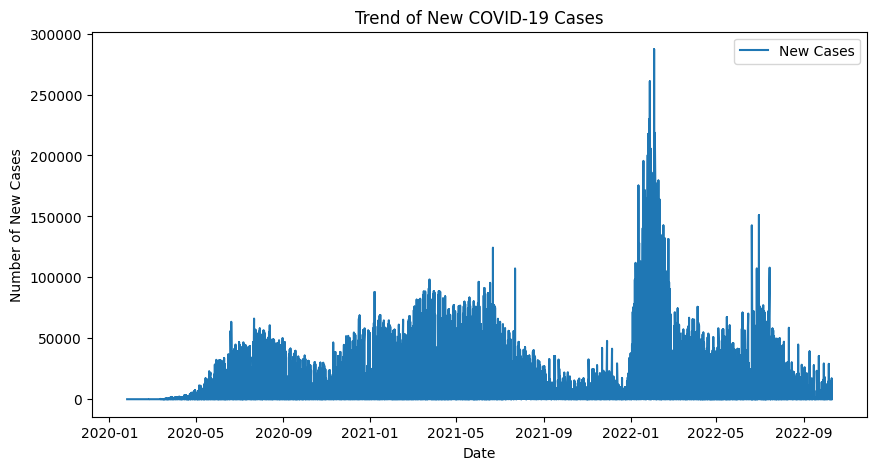

In [9]:
if covid_data is not None and covid_data.shape[0] < 10000:
    plot_new_cases_trend(covid_data)
